In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense
from keras import Sequential

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
train_datagen=ImageDataGenerator(rescale=1.0/255)
validation_datagen=ImageDataGenerator(rescale=1.0/255)

In [5]:
train_set=train_datagen.flow_from_directory(r"C:\Users\HP\OneDrive\Desktop\Computer Vision\Animal Classification\train",
                                            batch_size=32,
                                            target_size=(256,256),
                                            class_mode="categorical")
validation_set=validation_datagen.flow_from_directory(r"C:\Users\HP\OneDrive\Desktop\Computer Vision\Animal Classification\test",
                                                      target_size=(256,256),
                                                      batch_size=32,
                                                      class_mode="categorical")

Found 3000 images belonging to 3 classes.
Found 780 images belonging to 3 classes.


In [6]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3))),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(64,(3,3),activation="relu")),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(128,(3,3),activation="relu")),
model.add(MaxPooling2D(2,2)),

#model.add(Conv2D(128,(3,3),activation="relu")),
#model.add(MaxPooling2D(2,2)),

model.add(Flatten()),

model.add(Dense(128,activation="relu")),
model.add(Dropout(0.15)),

model.add(Dense(64,activation="relu")),
model.add(Dropout(0.05)),

model.add(Dense(3,activation="softmax"))


model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
history=model.fit(train_set,epochs=30,validation_data=validation_set)

Epoch 1/30
94/94 [==============================] - 41s 331ms/step - loss: 0.9855 - accuracy: 0.5520 - val_loss: 0.7818 - val_accuracy: 0.5859
Epoch 2/30
94/94 [==============================] - 16s 172ms/step - loss: 0.7516 - accuracy: 0.6233 - val_loss: 0.6094 - val_accuracy: 0.7410
Epoch 3/30
94/94 [==============================] - 16s 172ms/step - loss: 0.6242 - accuracy: 0.7117 - val_loss: 0.4947 - val_accuracy: 0.8077
Epoch 4/30
94/94 [==============================] - 16s 172ms/step - loss: 0.5014 - accuracy: 0.7937 - val_loss: 0.3315 - val_accuracy: 0.8846
Epoch 5/30
94/94 [==============================] - 16s 171ms/step - loss: 0.3384 - accuracy: 0.8670 - val_loss: 0.1764 - val_accuracy: 0.9500
Epoch 6/30
94/94 [==============================] - 16s 170ms/step - loss: 0.1904 - accuracy: 0.9283 - val_loss: 0.1077 - val_accuracy: 0.9731
Epoch 7/30
94/94 [==============================] - 16s 172ms/step - loss: 0.1195 - accuracy: 0.9583 - val_loss: 0.0455 - val_accuracy: 0.9885

In [8]:
import matplotlib.pyplot as plt

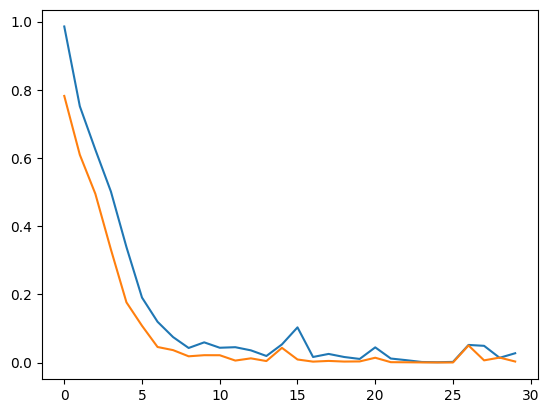

In [9]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

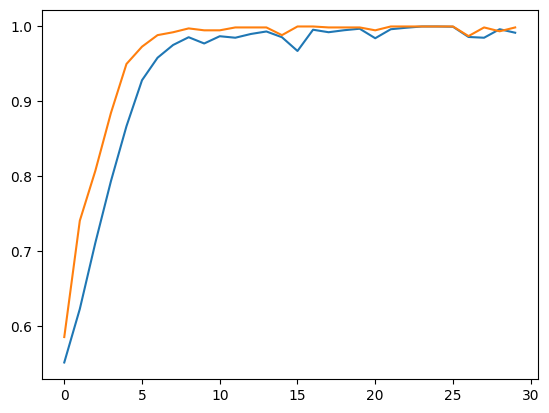

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [11]:
from tensorflow.keras.models import save_model

In [12]:
model.save("dog_cat_snake_classifier.h5")